# Analyzing COVID-era Instagram Sentiment in relation to Vaccination Rates

## References:

Google. (2025). Google Colaboratory. Retrieved December 7, 2025, from https://colab.research.google.com/

Mathieu, E., Ritchie, H., Ortiz-Ospina, E. et al. A global database of COVID-19 vaccinations. Natural Humanities Behavior (2024). https://doi.org/10.1038/s41562-021-01122-8

Thakur, N. (2024). Five Years of COVID-19 Discourse on Instagram: A Labeled Instagram Dataset of Over Half a Million Posts for Multilingual Sentiment Analysis [Data set]. Zenodo. https://doi.org/10.5281/zenodo.13896353

Thakur N., “Five Years of COVID-19 Discourse on Instagram: A Labeled Instagram Dataset of Over Half a Million Posts for Multilingual Sentiment Analysis”, Proceedings of the 7th International Conference on Machine Learning and Natural Language Processing (MLNLP 2024), Chengdu, China, October 18-20, 2024 (Paper accepted for publication, Preprint available at: https://arxiv.org/abs/2410.03293)

In [1]:

import pandas as pd
import numpy as np

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive') #We uploaded the datasets (find in the GitHub repo) to our drive, and accessed them from there.

Mounted at /content/drive


In [ ]:
#insta_df = pd.read_excel("/content/drive/My Drive/Dataset.xlsx") # (Thakur, 2025)
#vaccine_df = pd.read_csv("/content/drive/My Drive/owid-covid-data.csv") # (Mathieu et al., 2024)

In [3]:
#Uncomment if running in an IDE other than Colab
from pathlib import Path

DATA_DIR = Path("data")

insta_df = pd.read_excel(DATA_DIR / "Dataset.xlsx")
vaccine_df = pd.read_csv(DATA_DIR / "owid-covid-data.csv")

In [4]:
insta_df.head(4)

,PostID,Post Description,Date,Language Code,Full Language,Sentiment
0,B7mbLCVhYIf,QUESTIONS AND ANSWERS ON CORONAVIRUS PT. 2\n\n...,01/21/2020,en,English,positive
1,B7o2ozppOnS,#Viral China no deja salir a #11millones de ci...,01/22/2020,es,Spanish,negative
2,B7nMy1Xl7st,Önce tedbir sonra tevekkül inşallah. Wuhanda o...,01/22/2020,tr,Turkish,negative
3,B7m7M3SgvI1,Using humor to bring attention to a serious ma...,01/22/2020,en,English,negative


In [5]:
vaccine_df.head(4)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
insta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500153 entries, 0 to 500152
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   PostID            500153 non-null  object
 1   Post Description  500153 non-null  object
 2   Date              500153 non-null  object
 3   Language Code     500153 non-null  object
 4   Full Language     500153 non-null  object
 5   Sentiment         500153 non-null  object
dtypes: object(6)
memory usage: 22.9+ MB


In [7]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364170 entries, 0 to 364169
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    364170 non-null  object 
 1   continent                                   346839 non-null  object 
 2   location                                    364170 non-null  object 
 3   date                                        364170 non-null  object 
 4   total_cases                                 325996 non-null  float64
 5   new_cases                                   354444 non-null  float64
 6   new_cases_smoothed                          353185 non-null  float64
 7   total_deaths                                304322 non-null  float64
 8   new_deaths                                  354495 non-null  float64
 9   new_deaths_smoothed                         353265 non-null  float64
 

In [8]:
vaccine_df_agg = vaccine_df[["date", "new_vaccinations", "total_vaccinations", "people_vaccinated", "total_boosters"]].groupby('date').sum().reset_index()
vaccine_df_agg.tail(10)

,date,new_vaccinations,total_vaccinations,people_vaccinated,total_boosters
1439,2023-12-10,3804.0,4.267026e+10,1.749912e+10,8.819447e+09
1440,2023-12-11,18707.0,4.163527e+10,1.710047e+10,8.532902e+09
1441,2023-12-12,30806.0,4.161688e+10,1.709233e+10,8.529704e+09
1442,2023-12-13,3080.0,4.161690e+10,1.709233e+10,8.529716e+09
1443,2023-12-14,6181.0,4.163336e+10,1.709970e+10,8.532317e+09
1444,2023-12-15,4047.0,4.161678e+10,1.709224e+10,8.529759e+09
1445,2023-12-16,498.0,4.046472e+10,1.663369e+10,8.278184e+09
1446,2023-12-17,162.0,3.761262e+10,1.562510e+10,7.439375e+09
1447,2023-12-18,102.0,3.761734e+10,1.562510e+10,7.439376e+09
1448,2023-12-19,0.0,0.000000e+00,0.000000e+00,0.000000e+00


In [9]:
df = vaccine_df.copy()

num_cols = ['total_vaccinations','people_vaccinated','total_boosters','new_vaccinations']
for c in num_cols:
    if c in df:
        df[c] = pd.to_numeric(df[c], errors='coerce')

if 'location' in df:
    bad_groups = {
        'World','Africa','Asia','Europe','European Union','High income','Upper middle income',
        'Lower middle income','Low income','North America','South America','Oceania'
    }
    df = df[~df['location'].isin(bad_groups)]

timestamp_col = 'report_timestamp'
if timestamp_col in df.columns:
    df = (df.sort_values(['location','date',timestamp_col])
            .drop_duplicates(['location','date'], keep='last'))
else:
    df = (df.groupby(['location','date'], as_index=False)
            .agg({
                'total_vaccinations':'max',
                'people_vaccinated':'max',
                'total_boosters':'max',
                'new_vaccinations':'max'
            }))

for c in ['total_vaccinations','people_vaccinated','total_boosters']:
    if c in df:
        df[c] = df.groupby('location')[c].cummax()

df = df.sort_values(['location','date'])
df['new_vacc_from_total'] = (
    df.groupby('location')['total_vaccinations'].diff().clip(lower=0)
)

if 'total_boosters' in df:
    df['new_boosters_from_total'] = (
        df.groupby('location')['total_boosters'].diff().clip(lower=0)
    )

global_daily = (
    df.groupby('date', as_index=False)
      .agg(
          total_vaccinations=('total_vaccinations','sum'),
          people_vaccinated=('people_vaccinated','sum'),
          total_boosters=('total_boosters','sum'),
          new_vaccinations=('new_vacc_from_total','sum')
      )
)

global_daily.describe()


,total_vaccinations,people_vaccinated,total_boosters,new_vaccinations
count,1.449000e+03,1.449000e+03,1.449000e+03,1.449000e+03
mean,4.107612e+09,1.402494e+09,4.062543e+08,7.489611e+06
std,3.668006e+09,1.142931e+09,4.511299e+08,1.135218e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.668165e+06,3.588923e+06,0.000000e+00,3.469000e+03
50%,3.292783e+09,1.400179e+09,2.854744e+08,1.298606e+06
75%,8.249514e+09,2.375760e+09,8.444057e+08,1.070549e+07
max,1.038119e+10,4.396591e+09,1.930041e+09,4.711418e+07


In [10]:
insta_df['Date'] = pd.to_datetime(insta_df['Date'], format='%m/%d/%Y')
global_daily['date'] = pd.to_datetime(global_daily['date'])
display(insta_df.info())
display(global_daily.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500153 entries, 0 to 500152
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   PostID            500153 non-null  object        
 1   Post Description  500153 non-null  object        
 2   Date              500153 non-null  datetime64[ns]
 3   Language Code     500153 non-null  object        
 4   Full Language     500153 non-null  object        
 5   Sentiment         500153 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 22.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1449 non-null   datetime64[ns]
 1   total_vaccinations  1449 non-null   float64       
 2   people_vaccinated   1449 non-null   float64       
 3   total_boosters      1449 non-null   float64       
 4   new_vaccinations    1449 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 56.7 KB


None

In [11]:
merged_df = pd.merge(insta_df, global_daily, how='left', left_on='Date', right_on='date')
merged_df = merged_df[merged_df["date"] <= "2023-12-18 00:00:00"]
merged_df.tail(10)

,PostID,Post Description,Date,Language Code,Full Language,Sentiment,date,total_vaccinations,people_vaccinated,total_boosters,new_vaccinations
363497,C0-ldZkSYmu,Hai Dandelioners 😍\n\nLahir lagi karya baru di...,2023-12-18,id,Indonesian,positive,2023-12-18,2.284120e+09,1.055558e+09,244519251.0,102.0
363498,C0-hInqScYL,🍎３３８🍎\n\n 🌼コロナワクチンを打つ人へ🌼\n\n コロナワクチンを接種す...,2023-12-18,ja,Japanese,negative,2023-12-18,2.284120e+09,1.055558e+09,244519251.0,102.0
363499,C0-m55BSRfg,Hai Dandelioners 😍\n\nLahir lagi karya baru di...,2023-12-18,id,Indonesian,neutral,2023-12-18,2.284120e+09,1.055558e+09,244519251.0,102.0
363500,C0-ThIJoma-,Insomnio.. no puedo dormir el dolor no me dej...,2023-12-18,es,Spanish,positive,2023-12-18,2.284120e+09,1.055558e+09,244519251.0,102.0
363501,C0-ZmYCvF7r,👉🏻Millions of �NSW drivers are set to get a de...,2023-12-18,en,English,negative,2023-12-18,2.284120e+09,1.055558e+09,244519251.0,102.0
363502,C0-jxWdP8H7,ทิ้งท้ายปี2023 ได้เยี่ยมจริงๆ ครั้งแรกในชีวิตเ...,2023-12-18,th,Thai,negative,2023-12-18,2.284120e+09,1.055558e+09,244519251.0,102.0
363503,C0-e4m9Ogbw,What are some of your favorite things about RT...,2023-12-18,en,English,positive,2023-12-18,2.284120e+09,1.055558e+09,244519251.0,102.0
363504,C0-nP8lPWt0,"Covid tembus 40%,\nseperti dilansir oleh detik...",2023-12-18,id,Indonesian,neutral,2023-12-18,2.284120e+09,1.055558e+09,244519251.0,102.0
363505,C0_65IFupdt,My Companion Cleaning Services\nA clean enviro...,2023-12-18,en,English,positive,2023-12-18,2.284120e+09,1.055558e+09,244519251.0,102.0
363506,C0_cIDormR9,Last week to get your home cleaned and ready t...,2023-12-18,en,English,positive,2023-12-18,2.284120e+09,1.055558e+09,244519251.0,102.0


In [12]:
merged_df["Sentiment"].value_counts(normalize = True)

,proportion
Sentiment,
neutral,0.434008
positive,0.398245
negative,0.167746


In [13]:
merged_df["Full Language"].value_counts(normalize = True)

,proportion
Full Language,
English,0.749056
Hindi,0.036351
Spanish,0.036005
Tamil,0.024891
German,0.017557
...,...
Divehi,0.000003
Sundanese,0.000003
Kazakh,0.000003


In [14]:
merged_df["new_vaccinations"].describe()

,new_vaccinations
count,3.635070e+05
mean,1.245645e+07
std,1.360017e+07
min,0.000000e+00
25%,1.568700e+04
50%,5.524114e+06
75%,2.398974e+07
max,4.711418e+07


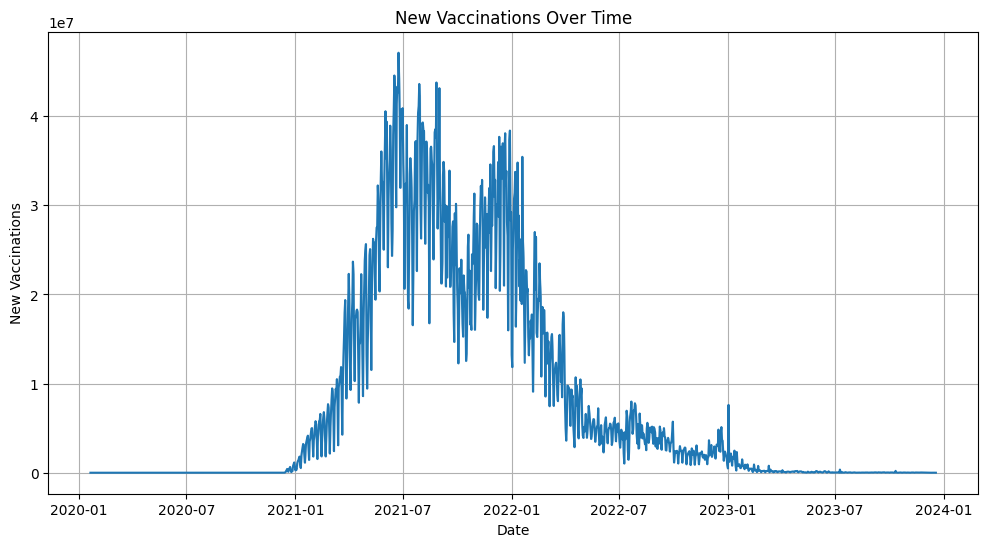

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Date', y='new_vaccinations')
plt.title('New Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('New Vaccinations')
plt.grid(True)
plt.show()

In [16]:
daily_sentiment_counts = merged_df.groupby(['Date', 'Sentiment']).size().unstack(fill_value=0)
daily_sentiment_counts['total_tweets'] = daily_sentiment_counts.sum(axis=1)
daily_sentiment_counts['positive_proportion'] = daily_sentiment_counts['positive'] / daily_sentiment_counts['total_tweets']

daily_sentiment_proportions = daily_sentiment_counts.reset_index()

display(daily_sentiment_proportions.head())

Sentiment,Date,negative,neutral,positive,total_tweets,positive_proportion
0,2020-01-21,0,0,1,1,1.000000
1,2020-01-22,6,0,1,7,0.142857
2,2020-01-23,2,1,1,4,0.250000
3,2020-01-24,1,2,2,5,0.400000
4,2020-01-25,7,11,5,23,0.217391


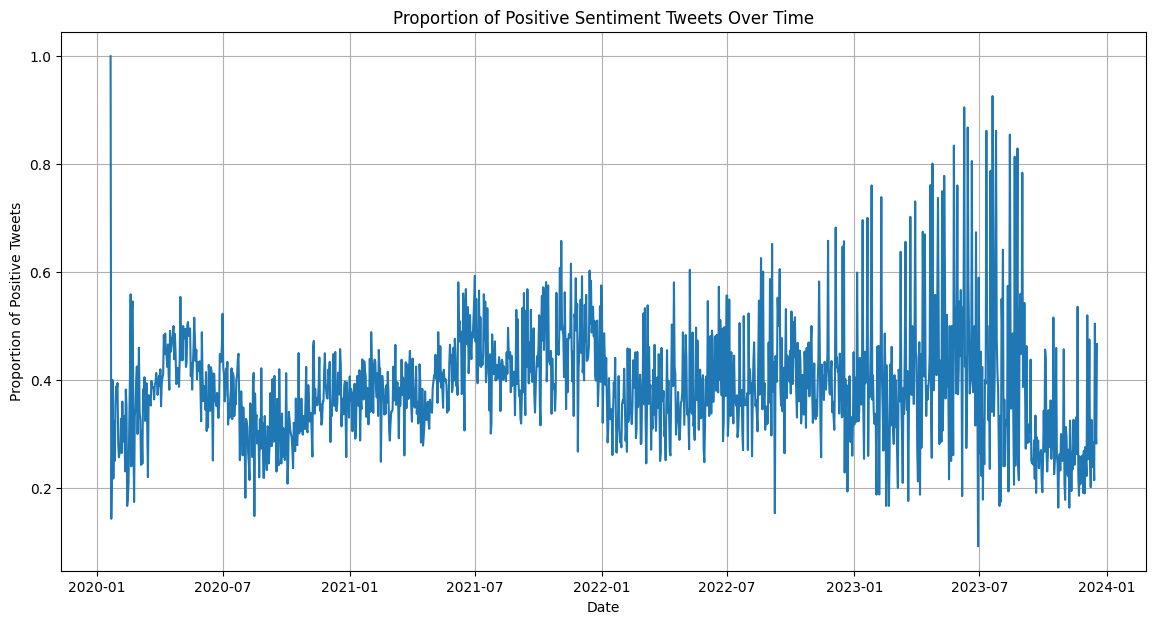

In [17]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sentiment_proportions, x='Date', y='positive_proportion')
plt.title('Proportion of Positive Sentiment Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion of Positive Tweets')
plt.grid(True)
plt.show()

In [18]:
comparison_df = pd.merge(daily_sentiment_proportions, global_daily, left_on='Date', right_on='date', how='inner')
comparison_df = comparison_df[['Date', 'positive_proportion', 'new_vaccinations']]

display(comparison_df.head())

,Date,positive_proportion,new_vaccinations
0,2020-01-21,1.000000,0.0
1,2020-01-22,0.142857,0.0
2,2020-01-23,0.250000,0.0
3,2020-01-24,0.400000,0.0
4,2020-01-25,0.217391,0.0


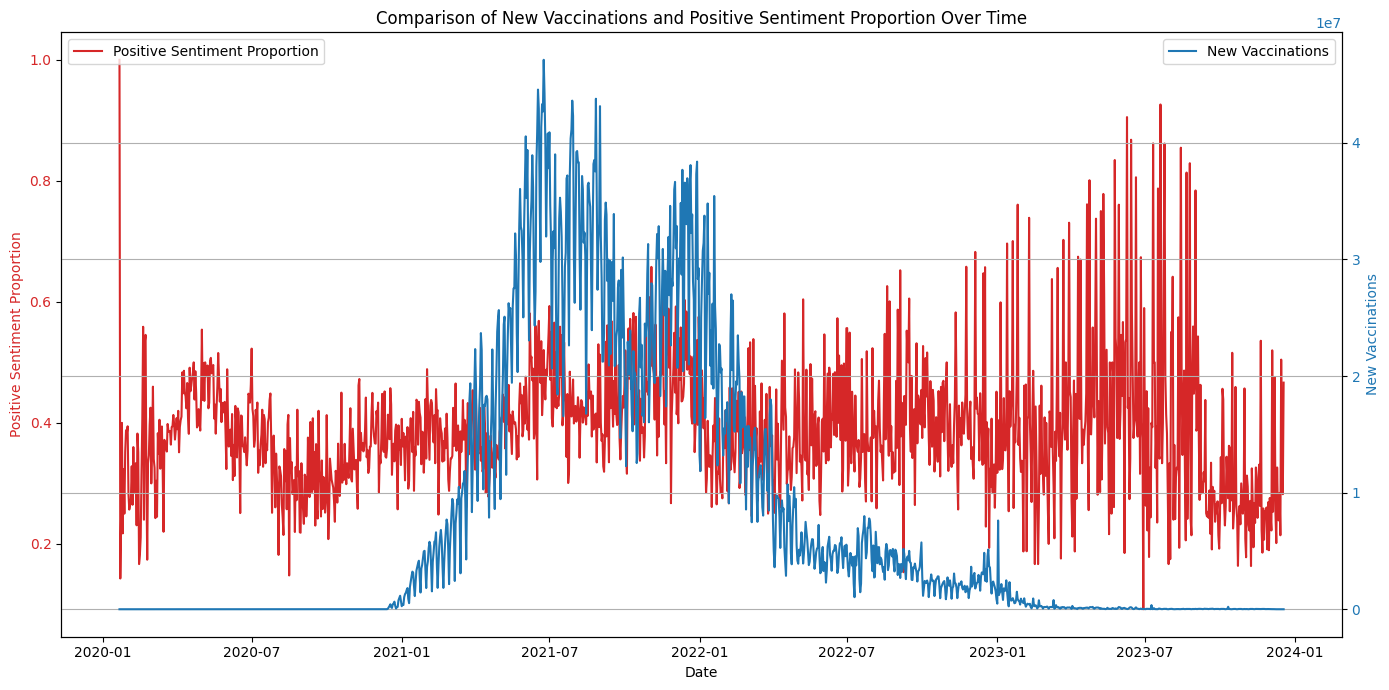

In [19]:
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Positive Sentiment Proportion', color=color)
sns.lineplot(x='Date', y='positive_proportion', data=comparison_df, ax=ax1, color=color, label='Positive Sentiment Proportion')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('New Vaccinations', color=color)
sns.lineplot(x='Date', y='new_vaccinations', data=comparison_df, ax=ax2, color=color, label='New Vaccinations')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Comparison of New Vaccinations and Positive Sentiment Proportion Over Time')
fig.tight_layout()
plt.grid(True)
plt.show()

In [20]:
df = vaccine_df.copy()

num_cols = ['total_vaccinations','people_vaccinated','total_boosters','new_vaccinations']
for c in num_cols:
    if c in df:
        df[c] = pd.to_numeric(df[c], errors='coerce')

if 'location' in df:
    bad_groups = {
        'World','Africa','Asia','Europe','European Union','High income','Upper middle income',
        'Lower middle income','Low income','North America','South America','Oceania'
    }
    df = df[~df['location'].isin(bad_groups)]

display(df.head())
display(df.info())

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 346839 entries, 0 to 364169
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    346839 non-null  object 
 1   continent                                   346839 non-null  object 
 2   location                                    346839 non-null  object 
 3   date                                        346839 non-null  object 
 4   total_cases                                 308910 non-null  float64
 5   new_cases                                   337140 non-null  float64
 6   new_cases_smoothed                          335941 non-null  float64
 7   total_deaths                                287386 non-null  float64
 8   new_deaths                                  337191 non-null  float64
 9   new_deaths_smoothed                         336021 non-null  float64
 10  t

None

In [21]:
from scipy.stats import spearmanr

comparison_df['cumulative_new_vaccinations'] = comparison_df['new_vaccinations'].cumsum()

corr, p = spearmanr(comparison_df['positive_proportion'], comparison_df['cumulative_new_vaccinations'])

print("Spearman correlation:", corr)
print("p-value:", p)

Spearman correlation: -0.01824746125235571
p-value: 0.4908202612111914


In [22]:
timestamp_col = 'report_timestamp'
if timestamp_col in df.columns:
    df = (df.sort_values(['location','date',timestamp_col])
            .drop_duplicates(['location','date'], keep='last'))
else:
    df = (df.groupby(['location','date'], as_index=False)
            .agg({
                'total_vaccinations':'max',
                'people_vaccinated':'max',
                'total_boosters':'max',
                'new_vaccinations':'max'
            }))

for c in ['total_vaccinations','people_vaccinated','total_boosters']:
    if c in df:
        df[c] = df.groupby('location')[c].cummax()

df = df.sort_values(['location','date'])
df['new_vacc_from_total'] = (
    df.groupby('location')['total_vaccinations'].diff().clip(lower=0)
)

if 'total_boosters' in df:
    df['new_boosters_from_total'] = (
        df.groupby('location')['total_boosters'].diff().clip(lower=0)
    )

display(df.head())
display(df.info())

,location,date,total_vaccinations,people_vaccinated,total_boosters,new_vaccinations,new_vacc_from_total,new_boosters_from_total
0,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346839 entries, 0 to 346838
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   location                 346839 non-null  object 
 1   date                     346839 non-null  object 
 2   total_vaccinations       67684 non-null   float64
 3   people_vaccinated        64230 non-null   float64
 4   total_boosters           37010 non-null   float64
 5   new_vaccinations         53683 non-null   float64
 6   new_vacc_from_total      53683 non-null   float64
 7   new_boosters_from_total  30665 non-null   float64
dtypes: float64(6), object(2)
memory usage: 21.2+ MB


None

In [23]:
global_daily = (
    df.groupby('date', as_index=False)
      .agg(
          total_vaccinations=('total_vaccinations','sum'),
          people_vaccinated=('people_vaccinated','sum'),
          total_boosters=('total_boosters','sum'),
          new_vaccinations=('new_vacc_from_total','sum')
      )
)

display(global_daily.head())
display(global_daily.info())
display(global_daily.describe())

,date,total_vaccinations,people_vaccinated,total_boosters,new_vaccinations
0,2020-01-01,0.0,0.0,0.0,0.0
1,2020-01-02,0.0,0.0,0.0,0.0
2,2020-01-03,0.0,0.0,0.0,0.0
3,2020-01-04,0.0,0.0,0.0,0.0
4,2020-01-05,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1449 non-null   object 
 1   total_vaccinations  1449 non-null   float64
 2   people_vaccinated   1449 non-null   float64
 3   total_boosters      1449 non-null   float64
 4   new_vaccinations    1449 non-null   float64
dtypes: float64(4), object(1)
memory usage: 56.7+ KB


None

,total_vaccinations,people_vaccinated,total_boosters,new_vaccinations
count,1.449000e+03,1.449000e+03,1.449000e+03,1.449000e+03
mean,4.107612e+09,1.402494e+09,4.062543e+08,7.489611e+06
std,3.668006e+09,1.142931e+09,4.511299e+08,1.135218e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.668165e+06,3.588923e+06,0.000000e+00,3.469000e+03
50%,3.292783e+09,1.400179e+09,2.854744e+08,1.298606e+06
75%,8.249514e+09,2.375760e+09,8.444057e+08,1.070549e+07
max,1.038119e+10,4.396591e+09,1.930041e+09,4.711418e+07


In [24]:
daily_sentiment_counts = merged_df.groupby(['Date', 'Sentiment']).size().unstack(fill_value=0)
daily_sentiment_counts['total_tweets'] = daily_sentiment_counts.sum(axis=1)
daily_sentiment_counts['positive_proportion'] = daily_sentiment_counts['positive'] / daily_sentiment_counts['total_tweets']

daily_sentiment_proportions = daily_sentiment_counts.reset_index()

display(daily_sentiment_proportions.head())
display(daily_sentiment_proportions.info())

Sentiment,Date,negative,neutral,positive,total_tweets,positive_proportion
0,2020-01-21,0,0,1,1,1.000000
1,2020-01-22,6,0,1,7,0.142857
2,2020-01-23,2,1,1,4,0.250000
3,2020-01-24,1,2,2,5,0.400000
4,2020-01-25,7,11,5,23,0.217391


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1428 non-null   datetime64[ns]
 1   negative             1428 non-null   int64         
 2   neutral              1428 non-null   int64         
 3   positive             1428 non-null   int64         
 4   total_tweets         1428 non-null   int64         
 5   positive_proportion  1428 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 67.1 KB


None

In [25]:
display(global_daily.head())
display(global_daily.tail())
display(global_daily.info())

,date,total_vaccinations,people_vaccinated,total_boosters,new_vaccinations
0,2020-01-01,0.0,0.0,0.0,0.0
1,2020-01-02,0.0,0.0,0.0,0.0
2,2020-01-03,0.0,0.0,0.0,0.0
3,2020-01-04,0.0,0.0,0.0,0.0
4,2020-01-05,0.0,0.0,0.0,0.0


,date,total_vaccinations,people_vaccinated,total_boosters,new_vaccinations
1444,2023-12-15,2.310995e+09,1.065453e+09,252736740.0,4047.0
1445,2023-12-16,2.310995e+09,1.065453e+09,252737162.0,498.0
1446,2023-12-17,2.279397e+09,1.055558e+09,244519171.0,162.0
1447,2023-12-18,2.284120e+09,1.055558e+09,244519251.0,102.0
1448,2023-12-19,0.000000e+00,0.000000e+00,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1449 non-null   object 
 1   total_vaccinations  1449 non-null   float64
 2   people_vaccinated   1449 non-null   float64
 3   total_boosters      1449 non-null   float64
 4   new_vaccinations    1449 non-null   float64
dtypes: float64(4), object(1)
memory usage: 56.7+ KB


None

In [26]:
display(daily_sentiment_proportions.head())
display(daily_sentiment_proportions.tail())
display(daily_sentiment_proportions.info())

Sentiment,Date,negative,neutral,positive,total_tweets,positive_proportion
0,2020-01-21,0,0,1,1,1.000000
1,2020-01-22,6,0,1,7,0.142857
2,2020-01-23,2,1,1,4,0.250000
3,2020-01-24,1,2,2,5,0.400000
4,2020-01-25,7,11,5,23,0.217391


Sentiment,Date,negative,neutral,positive,total_tweets,positive_proportion
1423,2023-12-14,47,206,69,322,0.214286
1424,2023-12-15,45,172,221,438,0.504566
1425,2023-12-16,50,122,76,248,0.306452
1426,2023-12-17,44,101,57,202,0.282178
1427,2023-12-18,71,184,223,478,0.466527


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1428 non-null   datetime64[ns]
 1   negative             1428 non-null   int64         
 2   neutral              1428 non-null   int64         
 3   positive             1428 non-null   int64         
 4   total_tweets         1428 non-null   int64         
 5   positive_proportion  1428 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 67.1 KB


None

In [27]:
display(comparison_df.head())
display(comparison_df.tail())
display(comparison_df.info())

,Date,positive_proportion,new_vaccinations,cumulative_new_vaccinations
0,2020-01-21,1.000000,0.0,0.0
1,2020-01-22,0.142857,0.0,0.0
2,2020-01-23,0.250000,0.0,0.0
3,2020-01-24,0.400000,0.0,0.0
4,2020-01-25,0.217391,0.0,0.0


,Date,positive_proportion,new_vaccinations,cumulative_new_vaccinations
1423,2023-12-14,0.214286,6181.0,1.085244e+10
1424,2023-12-15,0.504566,4047.0,1.085245e+10
1425,2023-12-16,0.306452,498.0,1.085245e+10
1426,2023-12-17,0.282178,162.0,1.085245e+10
1427,2023-12-18,0.466527,102.0,1.085245e+10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         1428 non-null   datetime64[ns]
 1   positive_proportion          1428 non-null   float64       
 2   new_vaccinations             1428 non-null   float64       
 3   cumulative_new_vaccinations  1428 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 44.8 KB


None

In [28]:
insta_df['Date'] = pd.to_datetime(insta_df['Date'], format='%m/%d/%Y')
global_daily['date'] = pd.to_datetime(global_daily['date'])
display(insta_df.info())
display(global_daily.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500153 entries, 0 to 500152
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   PostID            500153 non-null  object        
 1   Post Description  500153 non-null  object        
 2   Date              500153 non-null  datetime64[ns]
 3   Language Code     500153 non-null  object        
 4   Full Language     500153 non-null  object        
 5   Sentiment         500153 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 22.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1449 non-null   datetime64[ns]
 1   total_vaccinations  1449 non-null   float64       
 2   people_vaccinated   1449 non-null   float64       
 3   total_boosters      1449 non-null   float64       
 4   new_vaccinations    1449 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 56.7 KB


None

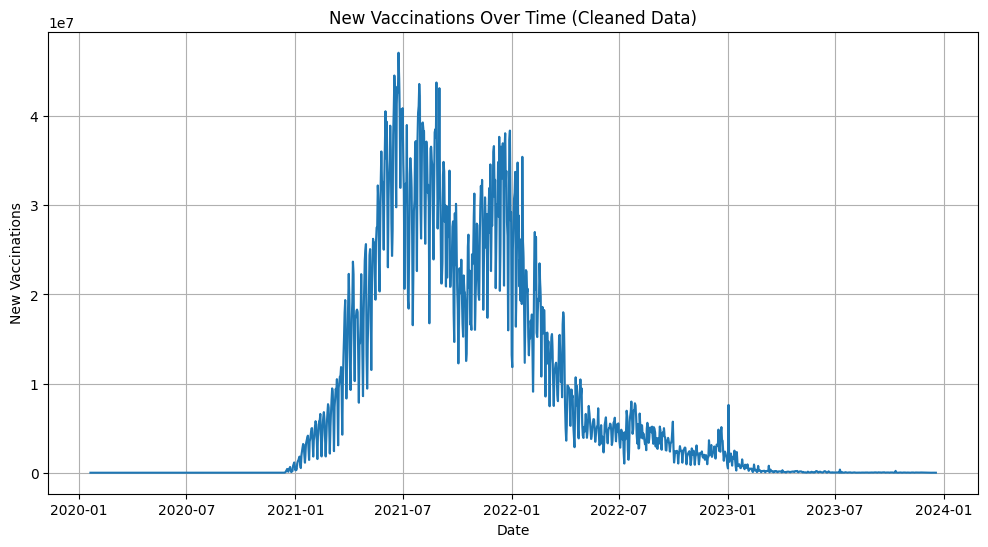

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Date', y='new_vaccinations')
plt.title('New Vaccinations Over Time (Cleaned Data)')
plt.xlabel('Date')
plt.ylabel('New Vaccinations')
plt.grid(True)
plt.show()

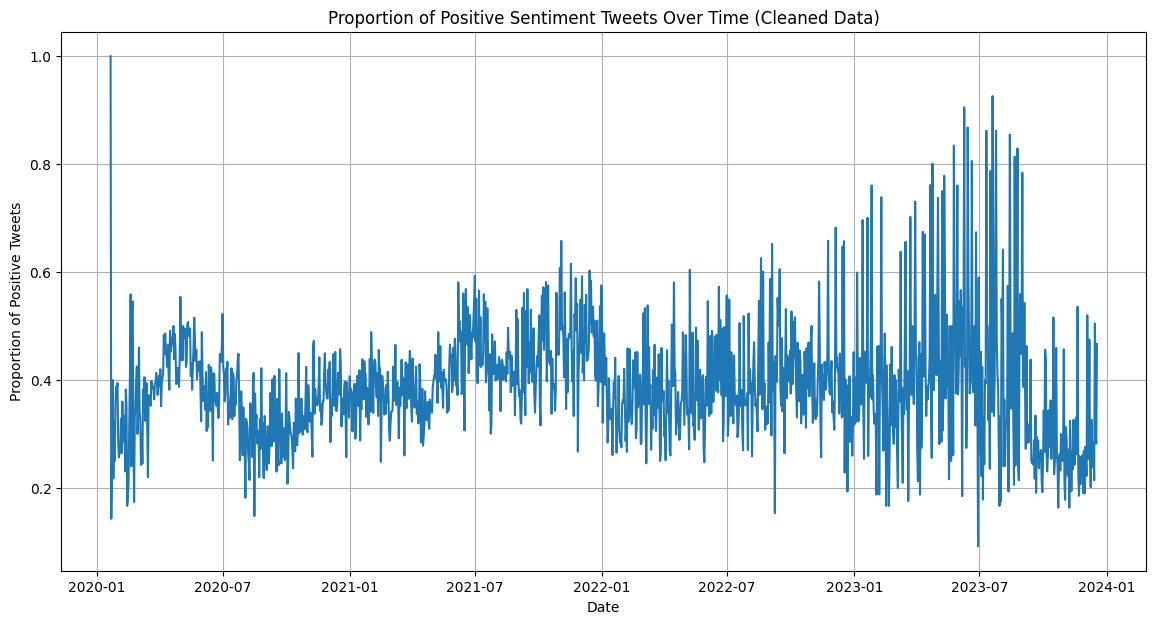

In [30]:
daily_sentiment_counts = merged_df.groupby(['Date', 'Sentiment']).size().unstack(fill_value=0)
daily_sentiment_counts['total_tweets'] = daily_sentiment_counts.sum(axis=1)
daily_sentiment_counts['positive_proportion'] = daily_sentiment_counts['positive'] / daily_sentiment_counts['total_tweets']

daily_sentiment_proportions = daily_sentiment_counts.reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sentiment_proportions, x='Date', y='positive_proportion')
plt.title('Proportion of Positive Sentiment Tweets Over Time (Cleaned Data)')
plt.xlabel('Date')
plt.ylabel('Proportion of Positive Tweets')
plt.grid(True)
plt.show()

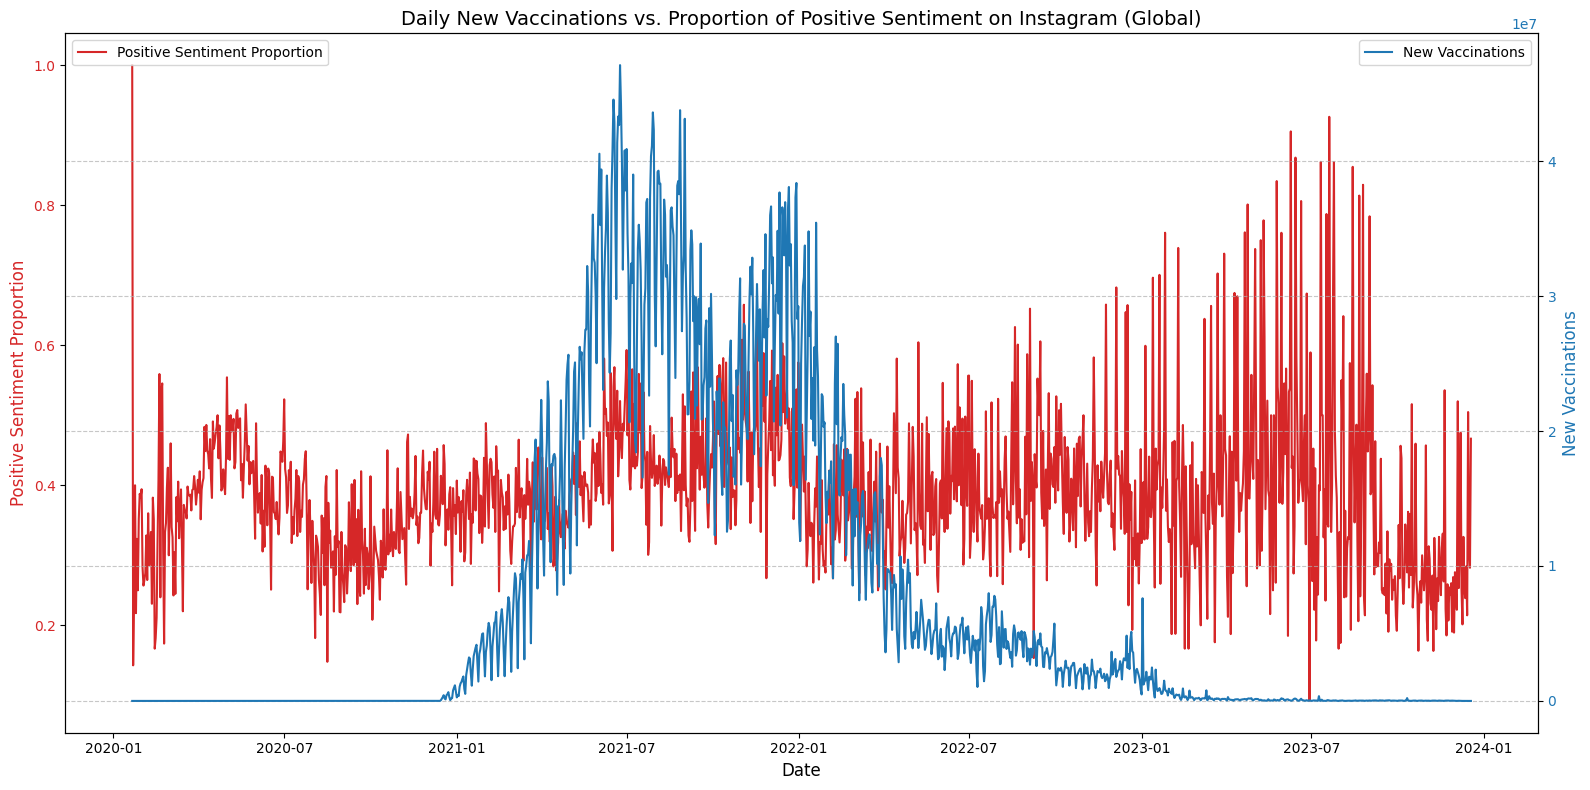

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(16, 8))

color = 'tab:red'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Positive Sentiment Proportion', color=color, fontsize=12)
sns.lineplot(x='Date', y='positive_proportion', data=comparison_df, ax=ax1, color=color, label='Positive Sentiment Proportion')
ax1.tick_params(axis='y', labelcolor=color, labelsize=10)
ax1.tick_params(axis='x', labelsize=10)
ax1.legend(loc='upper left', fontsize=10)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('New Vaccinations', color=color, fontsize=12)
sns.lineplot(x='Date', y='new_vaccinations', data=comparison_df, ax=ax2, color=color, label='New Vaccinations')
ax2.tick_params(axis='y', labelcolor=color, labelsize=10)
ax2.legend(loc='upper right', fontsize=10)

plt.title('Daily New Vaccinations vs. Proportion of Positive Sentiment on Instagram (Global)', fontsize=14) # More descriptive title
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

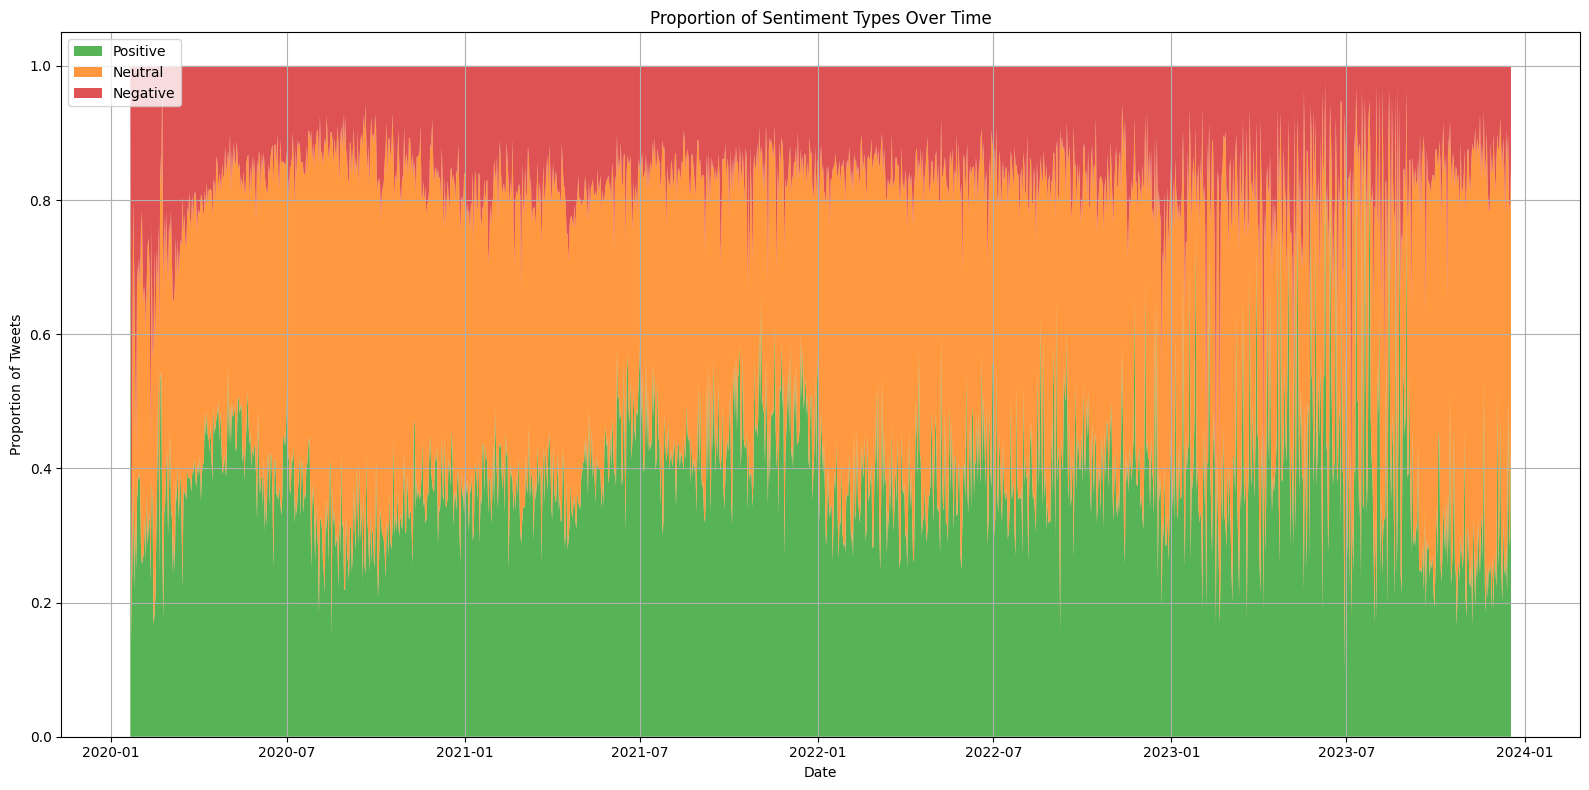

In [32]:
daily_sentiment_proportions_full = daily_sentiment_counts.reset_index()

daily_sentiment_proportions_full['negative_proportion'] = daily_sentiment_proportions_full['negative'] / daily_sentiment_proportions_full['total_tweets']
daily_sentiment_proportions_full['neutral_proportion'] = daily_sentiment_proportions_full['neutral'] / daily_sentiment_proportions_full['total_tweets']

plt.figure(figsize=(16, 8))

plt.stackplot(
    daily_sentiment_proportions_full['Date'],
    daily_sentiment_proportions_full['positive_proportion'],
    daily_sentiment_proportions_full['neutral_proportion'],
    daily_sentiment_proportions_full['negative_proportion'],
    labels=['Positive', 'Neutral', 'Negative'],
    colors=['#2ca02c', '#ff7f0e', '#d62728'], # green, orange, red
    alpha=0.8
)

plt.title('Proportion of Sentiment Types Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion of Tweets')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1050792898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.index, y=top_languages.values, palette='viridis')


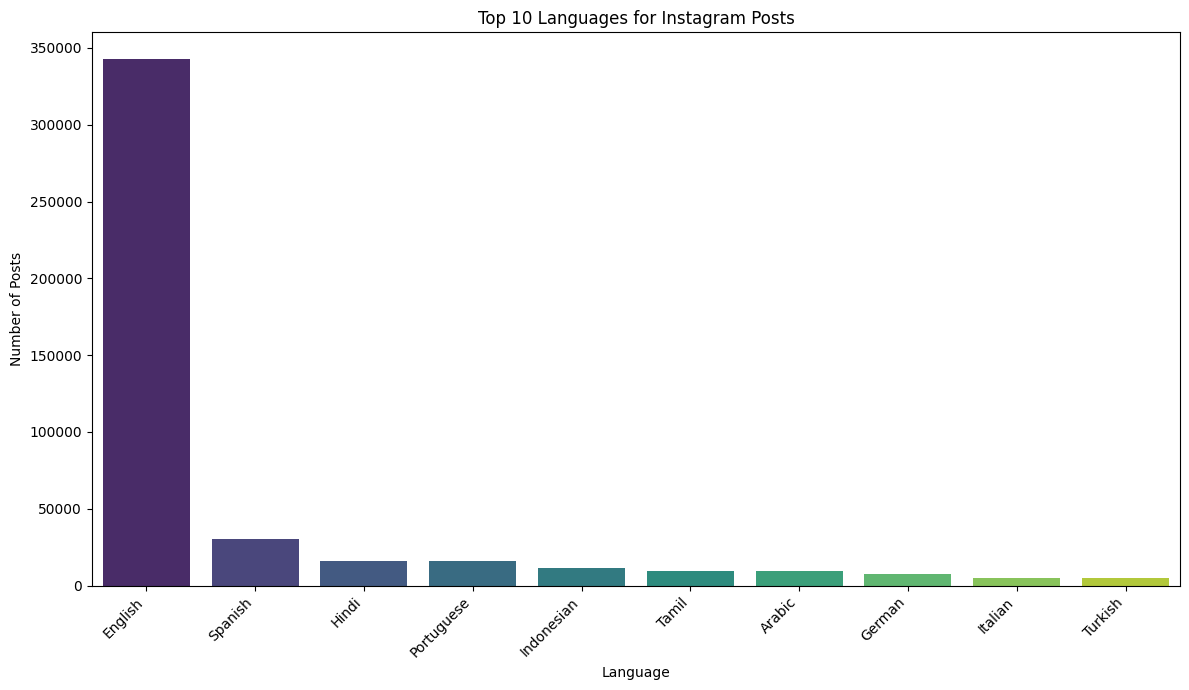

In [33]:
plt.figure(figsize=(12, 7))
top_languages = insta_df['Full Language'].value_counts().head(10)
sns.barplot(x=top_languages.index, y=top_languages.values, palette='viridis')
plt.title('Top 10 Languages for Instagram Posts')
plt.xlabel('Language')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

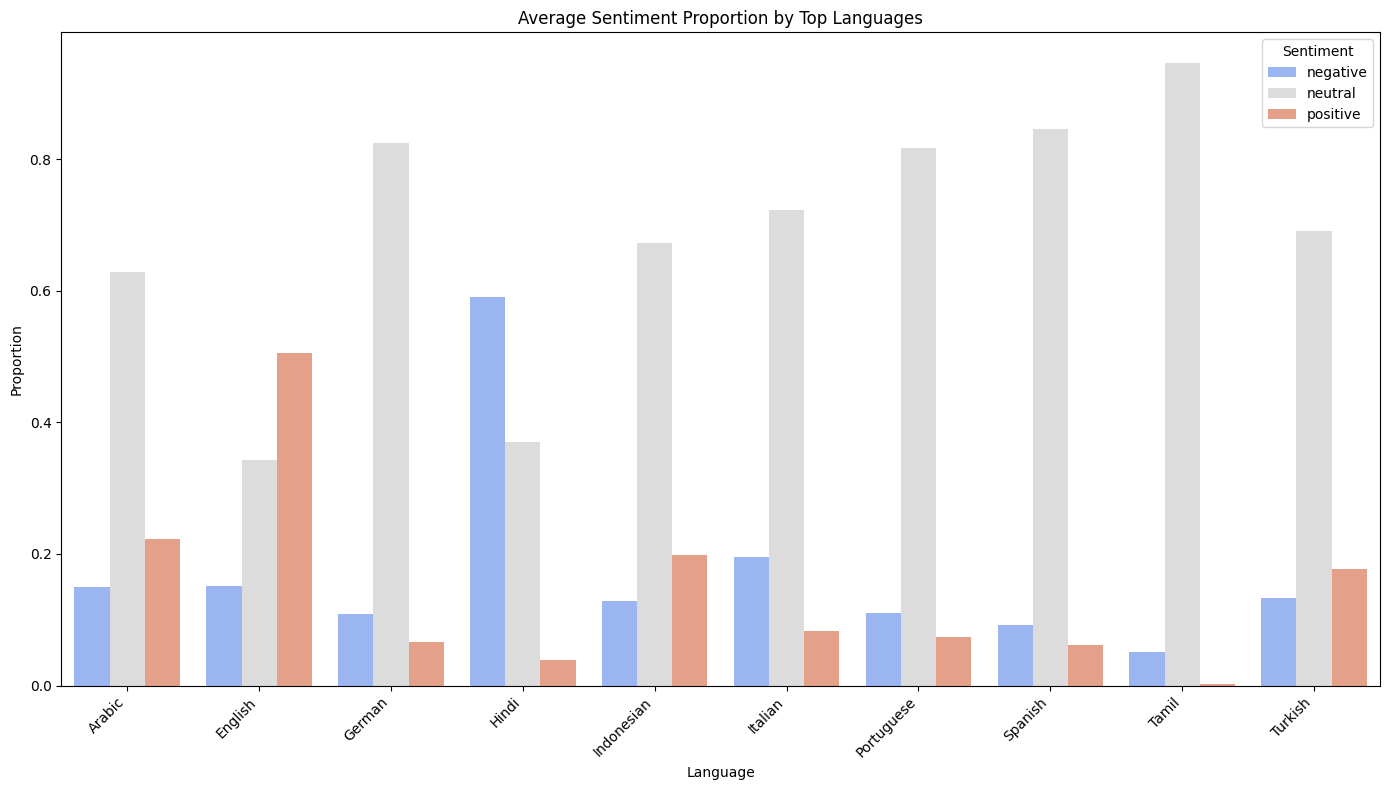

In [34]:
top_lang_names = top_languages.index.tolist()
sentiment_by_lang = merged_df[merged_df['Full Language'].isin(top_lang_names)]

avg_sentiment_by_lang = sentiment_by_lang.groupby('Full Language')['Sentiment'].value_counts(normalize=True).unstack(fill_value=0).reset_index()

avg_sentiment_by_lang_melted = avg_sentiment_by_lang.melt(id_vars='Full Language', var_name='Sentiment Type', value_name='Proportion')

plt.figure(figsize=(14, 8))
sns.barplot(x='Full Language', y='Proportion', hue='Sentiment Type', data=avg_sentiment_by_lang_melted, palette='coolwarm')
plt.title('Average Sentiment Proportion by Top Languages')
plt.xlabel('Language')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

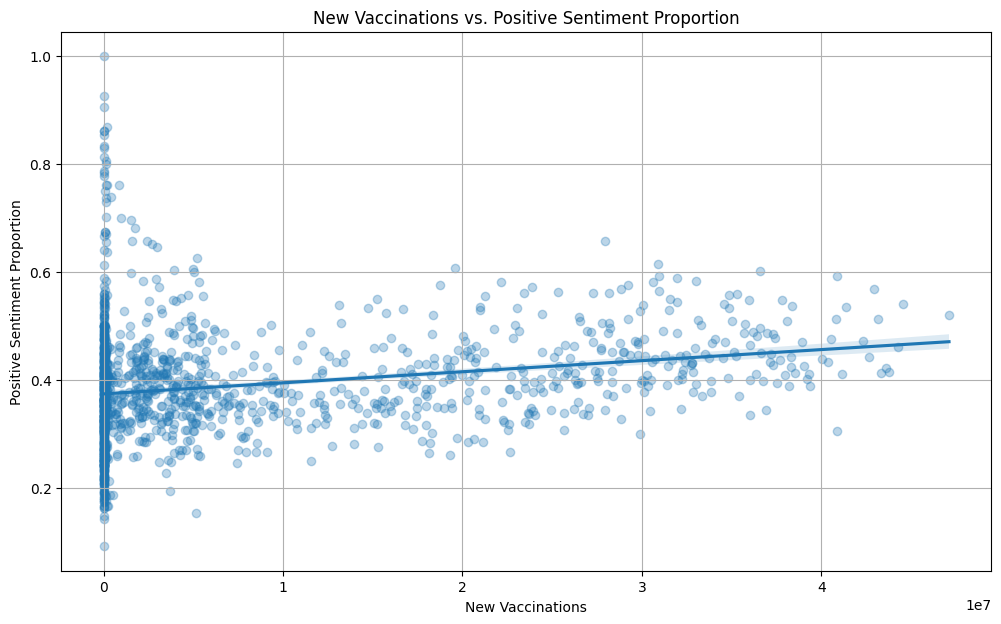

Pearson Correlation between New Vaccinations and Positive Sentiment Proportion: 0.2219


In [35]:
plt.figure(figsize=(12, 7))
sns.regplot(x='new_vaccinations', y='positive_proportion', data=comparison_df, scatter_kws={'alpha':0.3})
plt.title('New Vaccinations vs. Positive Sentiment Proportion')
plt.xlabel('New Vaccinations')
plt.ylabel('Positive Sentiment Proportion')
plt.grid(True)
plt.show()

correlation = comparison_df['new_vaccinations'].corr(comparison_df['positive_proportion'])
print(f"Pearson Correlation between New Vaccinations and Positive Sentiment Proportion: {correlation:.4f}")

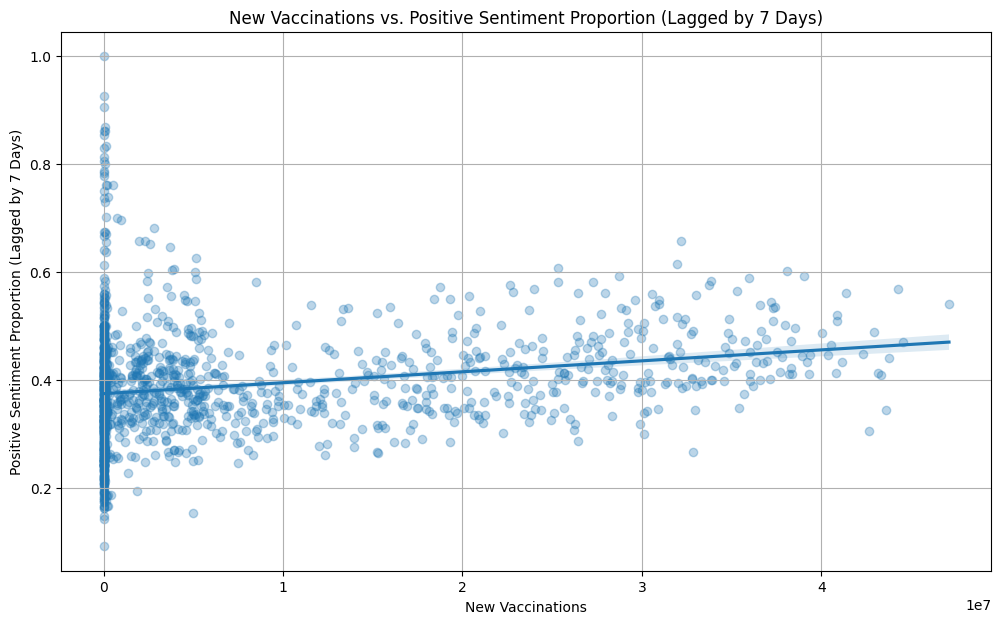

Pearson Correlation (lagged by 7 days): 0.2198


In [36]:
lag_days = 7
comparison_df['positive_proportion_lagged'] = comparison_df['positive_proportion'].shift(lag_days)

plt.figure(figsize=(12, 7))
sns.regplot(x='new_vaccinations', y='positive_proportion_lagged', data=comparison_df.dropna(), scatter_kws={'alpha':0.3})
plt.title(f'New Vaccinations vs. Positive Sentiment Proportion (Lagged by {lag_days} Days)')
plt.xlabel('New Vaccinations')
plt.ylabel(f'Positive Sentiment Proportion (Lagged by {lag_days} Days)')
plt.grid(True)
plt.show()

lagged_correlation = comparison_df['new_vaccinations'].corr(comparison_df['positive_proportion_lagged'])
print(f"Pearson Correlation (lagged by {lag_days} days): {lagged_correlation:.4f}")

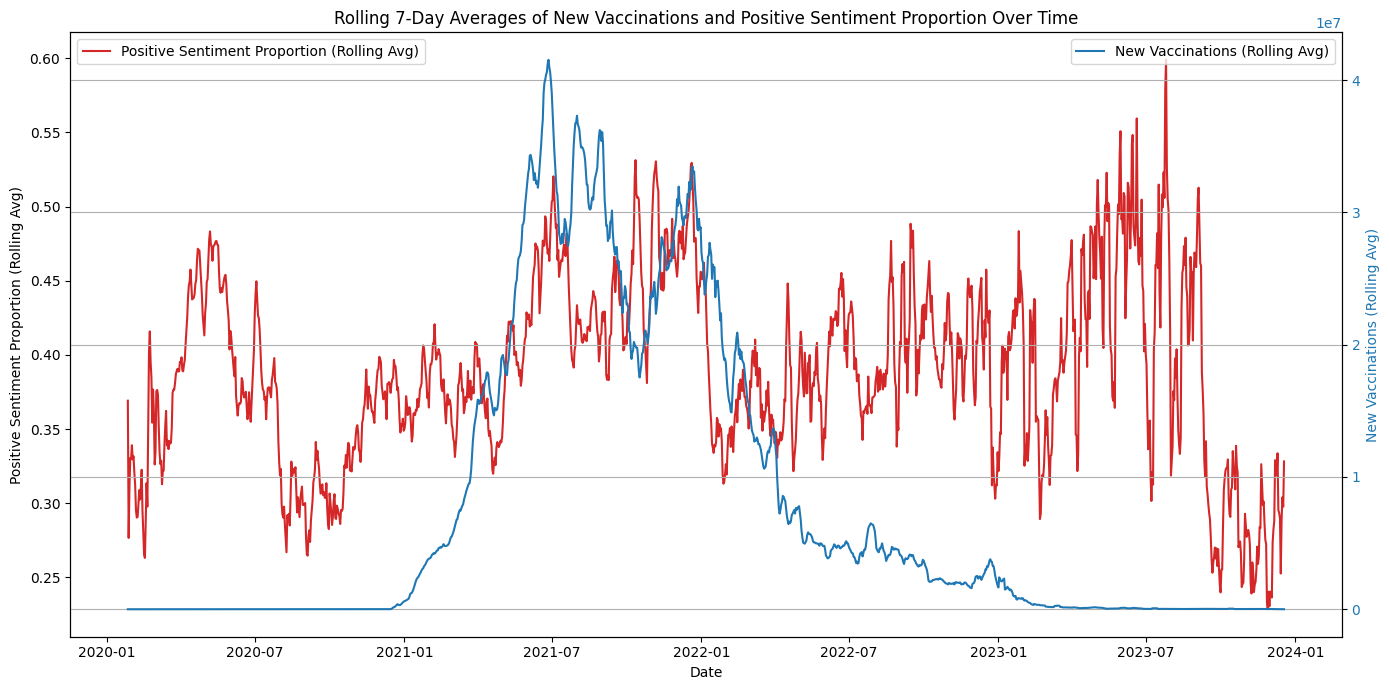

In [37]:
window_size = 7

comparison_df['new_vaccinations_rolling_avg'] = comparison_df['new_vaccinations'].rolling(window=window_size).mean()
comparison_df['positive_proportion_rolling_avg'] = comparison_df['positive_proportion'].rolling(window=window_size).mean()

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Positive Sentiment Proportion (Rolling Avg)')
sns.lineplot(x='Date', y='positive_proportion_rolling_avg', data=comparison_df, ax=ax1, color=color, label='Positive Sentiment Proportion (Rolling Avg)')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('New Vaccinations (Rolling Avg)', color=color)
sns.lineplot(x='Date', y='new_vaccinations_rolling_avg', data=comparison_df, ax=ax2, color=color, label='New Vaccinations (Rolling Avg)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title(f'Rolling {window_size}-Day Averages of New Vaccinations and Positive Sentiment Proportion Over Time')
fig.tight_layout()
plt.grid(True)
plt.show()

In [38]:
global_daily['cumulative_new_vaccinations'] = global_daily['new_vaccinations'].cumsum()

display(global_daily[['date', 'total_vaccinations', 'new_vaccinations', 'cumulative_new_vaccinations']].head())
display(global_daily[['date', 'total_vaccinations', 'new_vaccinations', 'cumulative_new_vaccinations']].tail())

,date,total_vaccinations,new_vaccinations,cumulative_new_vaccinations
0,2020-01-01,0.0,0.0,0.0
1,2020-01-02,0.0,0.0,0.0
2,2020-01-03,0.0,0.0,0.0
3,2020-01-04,0.0,0.0,0.0
4,2020-01-05,0.0,0.0,0.0


,date,total_vaccinations,new_vaccinations,cumulative_new_vaccinations
1444,2023-12-15,2.310995e+09,4047.0,1.085245e+10
1445,2023-12-16,2.310995e+09,498.0,1.085245e+10
1446,2023-12-17,2.279397e+09,162.0,1.085245e+10
1447,2023-12-18,2.284120e+09,102.0,1.085245e+10
1448,2023-12-19,0.000000e+00,0.0,1.085245e+10


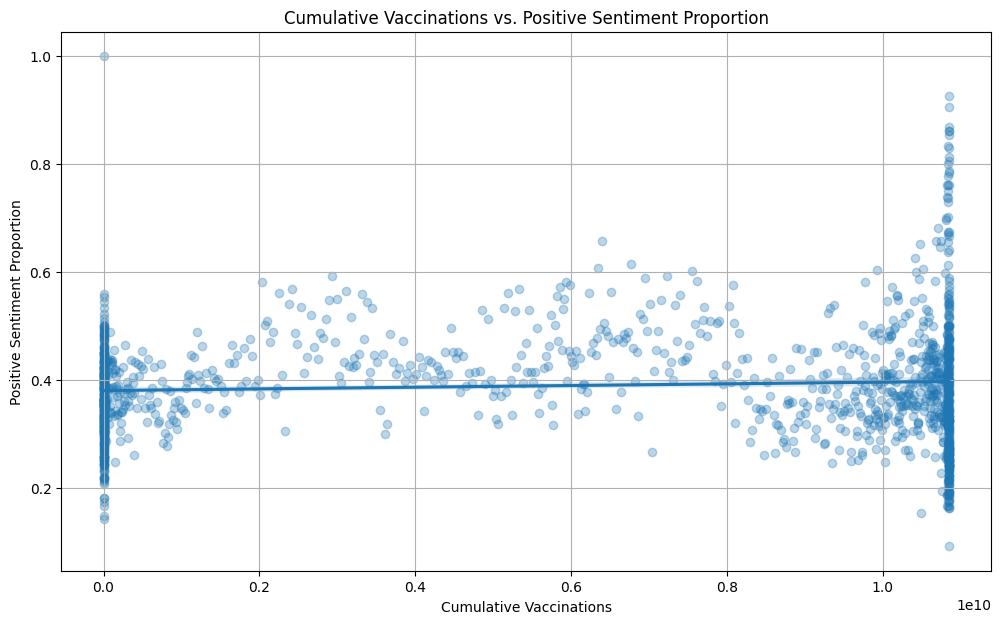

Pearson Correlation between Cumulative Vaccinations and Positive Sentiment Proportion: 0.0702


In [39]:
plt.figure(figsize=(12, 7))
sns.regplot(x='cumulative_new_vaccinations', y='positive_proportion', data=comparison_df, scatter_kws={'alpha':0.3})
plt.title('Cumulative Vaccinations vs. Positive Sentiment Proportion')
plt.xlabel('Cumulative Vaccinations')
plt.ylabel('Positive Sentiment Proportion')
plt.grid(True)
plt.show()

correlation = comparison_df['cumulative_new_vaccinations'].corr(comparison_df['positive_proportion'])
print(f"Pearson Correlation between Cumulative Vaccinations and Positive Sentiment Proportion: {correlation:.4f}")

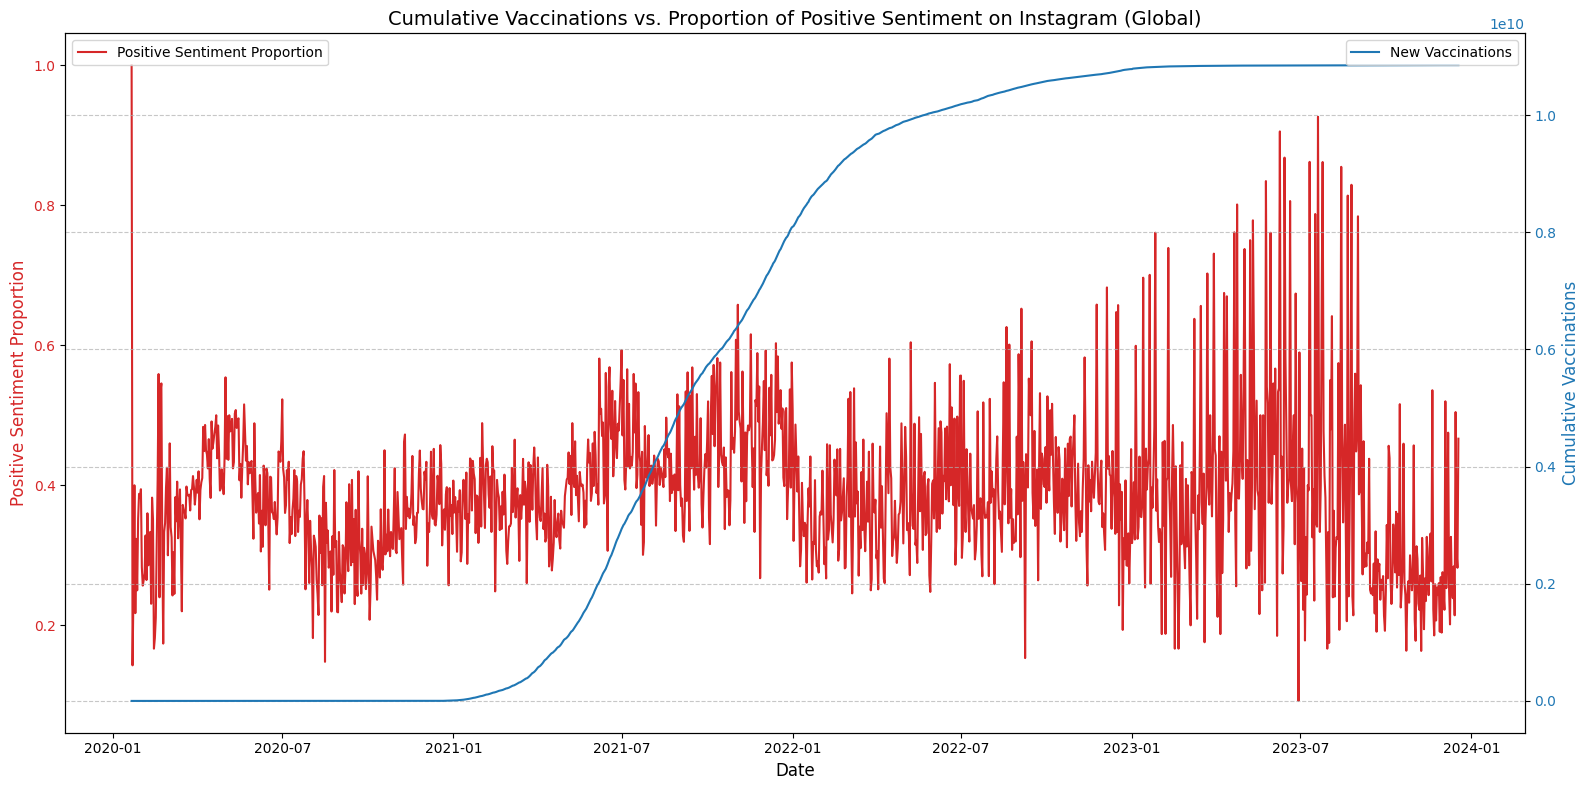

In [40]:
fig, ax1 = plt.subplots(figsize=(16, 8))

color = 'tab:red'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Positive Sentiment Proportion', color=color, fontsize=12)
sns.lineplot(x='Date', y='positive_proportion', data=comparison_df, ax=ax1, color=color, label='Positive Sentiment Proportion')
ax1.tick_params(axis='y', labelcolor=color, labelsize=10)
ax1.tick_params(axis='x', labelsize=10)
ax1.legend(loc='upper left', fontsize=10)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Cumulative Vaccinations', color=color, fontsize=12)
sns.lineplot(x='Date', y='cumulative_new_vaccinations', data=comparison_df, ax=ax2, color=color, label='New Vaccinations')
ax2.tick_params(axis='y', labelcolor=color, labelsize=10)
ax2.legend(loc='upper right', fontsize=10)

plt.title('Cumulative Vaccinations vs. Proportion of Positive Sentiment on Instagram (Global)', fontsize=14)
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [42]:
global_daily.to_csv('global_daily.csv', index=False)

In [43]:
!pip freeze > requirements.txt

In [44]:
!cat requirements.txt

absl-py==1.4.0
accelerate==1.12.0
access==1.1.9
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.2
aiosignal==1.4.0
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.2
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.11.0
anywidget==0.9.21
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.1.1
astropy-iers-data==0.2025.11.24.0.39.11
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.5
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.6
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.29.1
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==3.11.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==6.2.2
catalogue==2.0.10
certifi==2025.11.12
cffi==2.0.0
chardet==5.2.0
charset-normalizer==3.4.4
chex=

In [45]:
pip freeze

absl-py==1.4.0
accelerate==1.12.0
access==1.1.9
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.2
aiosignal==1.4.0
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.2
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.11.0
anywidget==0.9.21
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.1.1
astropy-iers-data==0.2025.11.24.0.39.11
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.5
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.6
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.29.1
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==3.11.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==6.2.2
catalogue==2.0.10
certifi==2025.11.12
cffi==2.0.0
chardet==5.2.0
charset-normalizer==3.4.4
chex=

In [46]:
!python --version

Python 3.12.12


In [47]:
import os
os.uname()

posix.uname_result(sysname='Linux', nodename='baefe5dfefb1', release='6.6.105+', version='#1 SMP Thu Oct  2 10:42:05 UTC 2025', machine='x86_64')